# Analysis of Stack Overflow 2018 Survey

In [465]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# Load schema.
df = pd.read_csv("survey_results_public.csv", delimiter=",")
schema = pd.read_csv("survey_results_schema.csv", delimiter=",")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part 1: How do deveoplers evalute a job opportunity?  

We are interested to find the most important variable that impact developers’ decision in the job hunting process. The SO survey results contain 10 columns of different criteria for job assessment that participants ranked based on order of importance. Let's analyze these columns by counting the frequency at which participants chose a criterion as rank 1. The most frequent criterion among the 10 columns will be the answer to our initial question. 

In [130]:
# Get a list of column names for a ranked questionnaire
# Parameters example: 
# name = "Test"
# count = 5
#
# The function will return this list:
# ["Test1", "Test2", "Test3", "Test4", "Test5"]
def getRankColumnNames(name, count):
    columns = []
    for i in range(1, count + 1):
        columns.append(name + str(i))
    return columns

In [131]:
assessJobColumns = getRankColumnNames("AssessJob", 10)
assessJobColumns

['AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10']

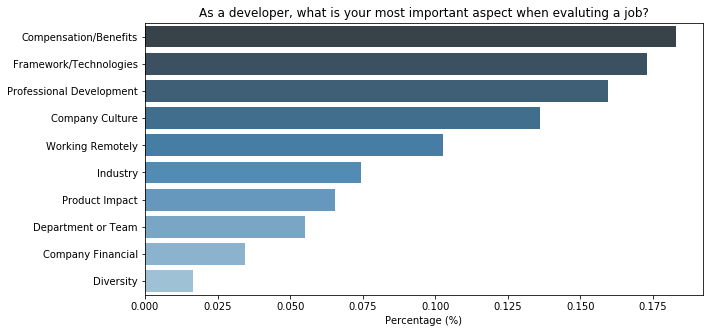

In [617]:
# Get the first row containing rank 1 occurance for each criteria
assessJobResults = df[assessJobColumns].apply(lambda s: s.value_counts(normalize=True)).iloc[0]

# Rename columns to the criteria being ranked.
jobSelectionCriteriaList = ['Industry', 'Company Financial', 'Department or Team', 'Framework/Technologies', 'Compensation/Benefits', 'Company Culture', 'Working Remotely', 'Professional Development', 'Diversity', 'Product Impact'] 
assessJobResults.index = jobSelectionCriteriaList

# Sort results
assessJobResults = assessJobResults.sort_values(ascending=False)

a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
jobPlot = sns.barplot(x = assessJobResults.values, y = assessJobResults.index, palette="Blues_d");
jobPlot.set(xlabel='Percentage (%)');
jobPlot.set_title("As a developer, what is your most important aspect when evaluting a job?");

Our analysis revealed that 18% of the developers highly prioritize compensation and benefits over other aspects when evaluating a job opportunity. This finding has a huge business value for HR recruiters. Remarkably, the second in the list is programming language and framework with almost 17% of the developers choosing this as their top criteria. 

Of course, this analysis can be improved further by segmenting the results (i.e. filtering by age, gender or other variables) in order to eliminate some of the biases. 

# Part 2: Does a developer age affect how they view AI risks?  

In [590]:
# Map a DataFrame values based on the given dictionary 
def mapDfColumn(df, columnName, newValues):
    df[columnName] = df[columnName].map(newValues)
    return df

In [615]:
# Group df by a specified variable ("groupByColumn") then get value_counts for another variable ("countColumn")
# This function is helpful in analyzing whether two variables are correlated
def getCountForGroupedDf(df, groupByColumn, countColumn):
    valueCountsResults = df.groupby(groupByColumn)[countColumn].value_counts(normalize=True)
    return pd.DataFrame(data={'Percentage (%)': valueCountsResults.values}, index=valueCountsResults.index).reset_index()

In [606]:
AIDf = df.copy()

# Rename "age" and "AIDangerous" values to make them shorter
AIDangerousNewValues = {"Artificial intelligence surpassing human intelligence (\"the singularity\")": "The Singularity",
"Evolving definitions of \"fairness\" in algorithmic versus human decisions": "Fairness",
"Algorithms making important decisions": "Decision Making",
"Increasing automation of jobs": "Automation"}
ageNewValues = {"Under 18 years old": " (<18)",
"18 - 24 years old": "(18-24)",
"25 - 34 years old": "(25-34)",
"35 - 44 years old": "(35-44)",
"45 - 54 years old": "(45-54)",
"55 - 64 years old": "(55-64)",
"65 years or older": "(>65)"}

AIDf = mapDfColumn(AIDf, 'AIDangerous', AIDangerousNewValues)
AIDf = mapDfColumn(AIDf, 'Age', ageNewValues)

# We want to see how each age group view AI risks. Let's calcluate the frequency of each AI risk response for every age group.
AIResultDf = getCountForGroupedDf(AIDf, "Age", "AIDangerous")
AIResultDf.head()

,Age,AIDangerous,Percentage (%)
0,(<18),The Singularity,0.391724
1,(<18),Automation,0.249655
2,(<18),Decision Making,0.198621
3,(<18),Fairness,0.160000
4,(18-24),The Singularity,0.316417


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


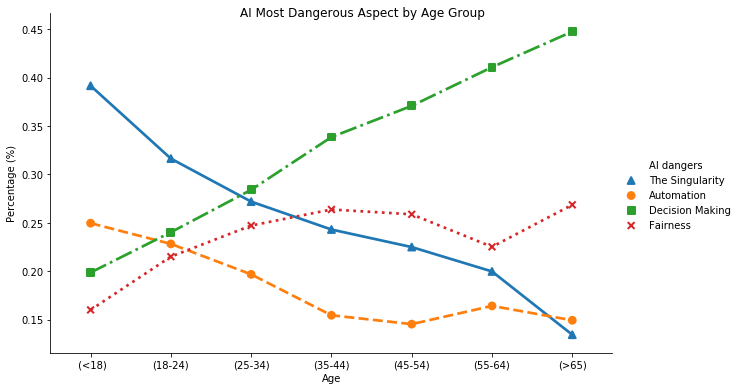

In [607]:
AIPlot = sns.catplot(x="Age", y="Percentage (%)", hue="AIDangerous",
            markers=["^", "o", "s", "x"], linestyles=["-", "--", "-.", ":"],
            kind="point", data=AIResultDf, size=5.5, aspect=1.6);

AIPlot.fig.suptitle("AI Most Dangerous Aspect by Age Group")
AIPlot._legend.set_title("AI dangers")

# Part 3: Do developers working in small and large companies have the same  career goals?  

In [608]:
HopeDf = df.copy()

# Rename "HopeFiveYears" and "CompanySize" values to make them shorter
hopeFiveYearsNewValues = {"Working as a founder or co-founder of my own company": "Becoming a Founder/CEO",
"Working in a different or more specialized technical role than the one I'm in now": "Working in different/more technical role",
"Doing the same work": "Doing same work",
"Working as a product manager or project manager": "Becoming a product/project manager",
"Working as an engineering manager or other functional manager": "Becoming an engineering manager",
"Working in a career completely unrelated to software development": "Changing career",
"Retirement": "Retirement"}
companySizeNewValues = {"Fewer than 10 employees": "<10",
"10 to 19 employees": "10-19",
"20 to 99 employees": "20-99",
"100 to 499 employees": "100-499",
"500 to 999 employees": "500-999",
"1,000 to 4,999 employees": "1000-4999",
"5,000 to 9,999 employees": "5000-9999",
"10,000 or more employees": ">10000"}

HopeDf = mapDfColumn(HopeDf, 'HopeFiveYears', hopeFiveYearsNewValues)
HopeDf = mapDfColumn(HopeDf, 'CompanySize', companySizeNewValues)


# Force a custom order for the CompanySize column. Otherwise, results will be sorted alphabetically 
HopeDf['CompanySize'] = pd.Categorical(HopeDf['CompanySize'], categories=
    ['<10', '10-19', '20-99', '100-499', '500-999', '1000-4999', '5000-9999', '>10000'],
    ordered=True)

# Calcluate the frequency of each future goal response for every company size
HopeResultDf = getCountForGroupedDf(HopeDf, "CompanySize", "HopeFiveYears")
HopeResultDf.head()


,CompanySize,HopeFiveYears,Percentage (%)
0,<10,Becoming a Founder/CEO,0.299390
1,<10,Working in different/more technical role,0.291038
2,<10,Doing same work,0.217796
3,<10,Becoming a product/project manager,0.074366
4,<10,Becoming an engineering manager,0.067780


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


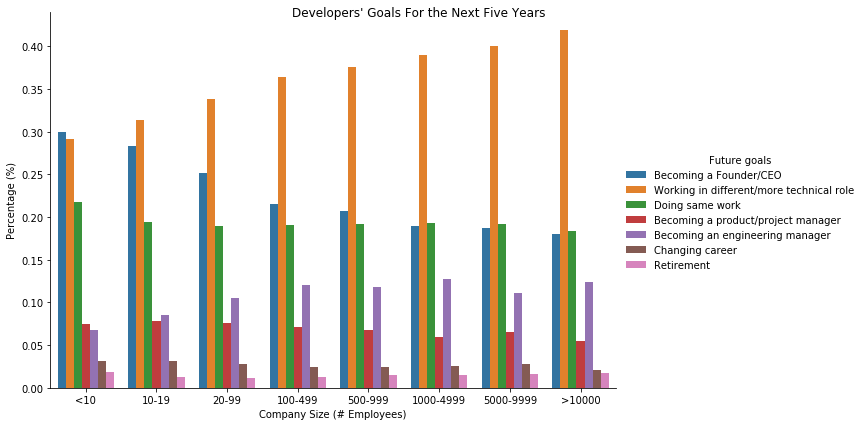

In [610]:
hopePlot = sns.catplot(x="CompanySize", y="Percentage (%)", hue="HopeFiveYears",
            kind="bar", data=HopeResultDf, size=6, aspect=1.5);
hopePlot.set(xlabel='Company Size (# Employees)');
hopePlot.fig.suptitle("Developers' Goals For the Next Five Years");
hopePlot._legend.set_title("Future goals")